In [1]:
from math import sqrt
from statistics import mean

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from turtle import title
import seaborn as sns

In [6]:
df_ieee = pd.read_csv("SOURCE/IEEE_Xplore.csv", sep=',', quotechar='"')
df_ieee['Publication Title'] = df_ieee['Publication Title'].str.replace(r'^[0-9]* ', '')
df_ieee['Publication Title'] = df_ieee['Publication Title'].str.replace(r'[0-9]+(?:st| st|nd| nd|rd| rd|th| th) ', '')
pd.DataFrame(df_ieee.groupby('Publication Title')['Document Title'].count().sort_values(ascending=False)).to_csv("COUNT/IEEE_Xplore_count.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'SOURCE/IEEE_Xplore.csv'

In [7]:
df_acm = pd.read_csv("SOURCE/ACM_cleaned.csv", header=None)
df_acm[0] = df_acm[0].str.replace("Proceedings of the [0-9]+(?:st| st|nd| nd|rd| rd|th| th) ","")
df_acm[0] = df_acm[0].str.replace("Proceedings of the [0-9][0-9][0-9][0-9] "."")
df_acm[0] = df_acm[0].str.replace(" \d+$"."")
pd.DataFrame(df_acm.groupby(0)[0].count().sort_values(ascending=False)).to_csv("COUNT/ACM_count.csv")

SyntaxError: invalid syntax (2901046052.py, line 3)

In [8]:
df_springer = pd.read_csv("SOURCE/Springer.csv". sep=',')
pd.DataFrame(df_springer.groupby("Publication Title")["Publication Title"].count().sort_values(ascending=False)).to_csv("COUNT/Springer_count.csv")

SyntaxError: expression cannot contain assignment, perhaps you meant "=="? (4192474537.py, line 1)

In [9]:
df_sciencedirect = pd.read_csv("SOURCE/ScienceDirect.csv", sep=',', header=None)
pd.DataFrame(df_sciencedirect.groupby(0)[0].count().sort_values(ascending=False)).to_csv("COUNT/ScienceDirect_count.csv")

In [10]:
df_acl = pd.read_csv("ACL_Anthology.csv", sep=',', escapechar='\\')
df_acl['Year']=pd.to_numeric(df_acl["Year"])
df_acl = df_acl[df_acl['Year'] >= 2017]
df_acl

cols_to_filter = ['Abstract', 'Title']
search_values = ["topic label", "topic labels", "topic labeling", "topic labelling"]

patt = '|'.join(search_values)

mask = df_acl[cols_to_filter].apply(lambda x: x.str.contains(patt, case=False)).any(1)
df_acl = df_acl[mask].copy()

df_acl['Venue'] = df_acl['Venue'].str.replace("Proceedings of the [0-9]+(?:st| st|nd| nd|rd| rd|th| th) ","")
df_acl['Venue'] = df_acl['Venue'].str.replace("Proceedings of the [0-9][0-9][0-9][0-9] ","")
df_acl.groupby('Venue')['Venue'].count().sort_values(ascending=False).to_csv("ACL_Anthology_count.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'ACL_Anthology.csv'

In [ ]:
pd.DataFrame(df_acl.groupby('Venue')['Venue'].count().sort_values(ascending=False))

NameError: name 'df_acl' is not defined

IndexError: single positional indexer is out-of-bounds

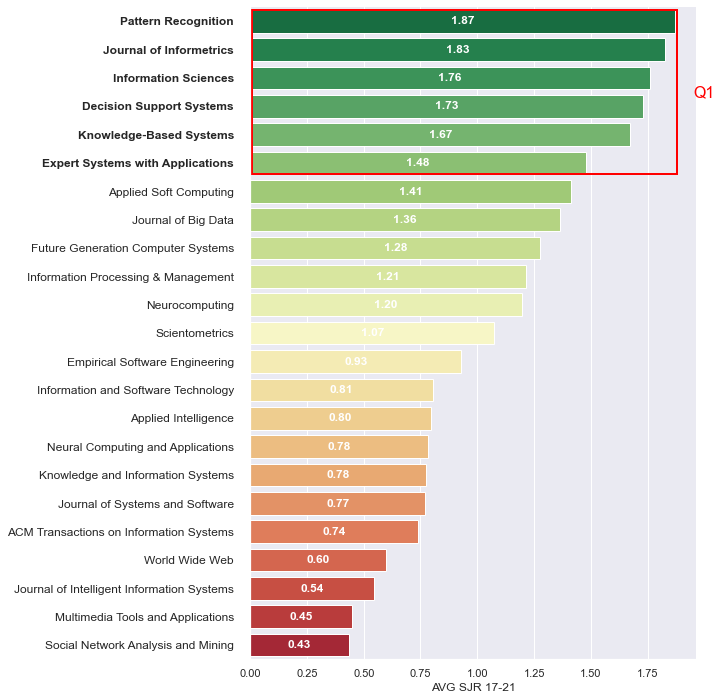

In [11]:
dict = {
    'Pattern Recognition': [1.871],
    'Journal of Informetrics': [1.827],
    'Information Sciences': [1.758],
    'Decision Support Systems': [1.729],
    'Knowledge-Based Systems': [1.674],
    'Expert Systems with Applications': [1.479],
    'Applied Soft Computing': [1.414],
    'Journal of Big Data': [1.363],
    'Future Generation Computer Systems': [1.278],
    'Information Processing & Management': [1.214],
    'Neurocomputing': [1.198],
    'Scientometrics': [1.075],
    'Empirical Software Engineering': [0.930],
    'Information and Software Technology': [0.806],
    'Applied Intelligence': [0.796],
    'Neural Computing and Applications': [0.784],
    'Knowledge and Information Systems': [0.775],
    'Journal of Systems and Software': [0.771],
    'ACM Transactions on Information Systems': [0.739],
    'World Wide Web': [0.598],
    'Journal of Intelligent Information Systems': [0.544],
    'Multimedia Tools and Applications': [0.449],
    'Social Network Analysis and Mining': [0.435]
}

import matplotlib.patches as patches

nr_res = pd.DataFrame(dict)
df_bar = nr_res.reset_index().melt(id_vars=["index"])
fig, ax = plt.subplots(figsize=(8, 12))
g = sns.barplot(y="variable", x="value", data=df_bar, ax=ax, palette=sns.color_palette("RdYlGn_r", n_colors=23))
g.set_xlabel('AVG SJR 17-21')
g.set_ylabel('')
sns.despine()

# Make the text of the first 6 y-axis entries bold
ax.tick_params(axis='y', which='major', pad=10)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)
for i in range(6):
    ax.get_yticklabels()[i].set_fontweight('bold')

# Calculate the width of the rectangle
rect_width = df_bar['value'][:1].sum()

# Add a rectangle that encloses the first six bars
rect = patches.Rectangle((0.01, -0.4), rect_width, 5.8, linewidth=2, edgecolor='red', facecolor='none')
ax.add_patch(rect)

# Add the "Q1" label to the rectangle
ax.text(rect.get_x() + rect.get_width()/2+1.05, rect.get_y() + rect.get_height()/2, 'Q1', fontsize=16, ha='center', va='center', color='red')

# Write the x-axis values inside each bar
for i, p in enumerate(ax.patches):
    ax.text(p.get_x() + p.get_width()/2, p.get_y() + p.get_height()/2, f'{df_bar.iloc[i]["value"]:.2f}', ha='center', va='center', color='white', fontsize=12, fontweight='bold')

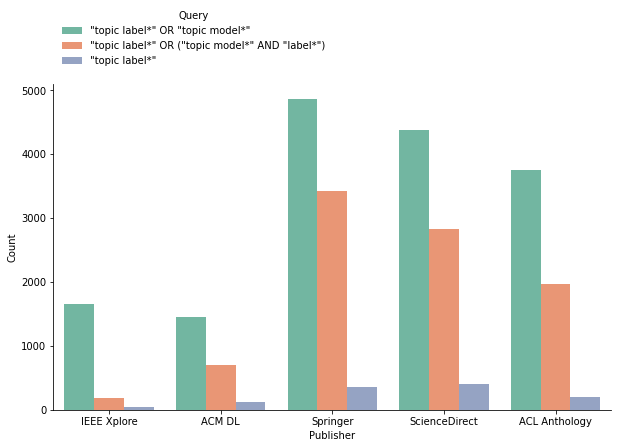

In [ ]:
dict = {
    "IEEE Xplore" : [1649, 179, 39],
    "ACM DL" : [1447, 708, 128],
    "Springer" : [4863, 3427, 364],
    "ScienceDirect" : [4385, 2833, 397],
    "ACL Anthology" : [3750, 1970, 206],
}

nr_res = pd.DataFrame(dict)
df_bar = nr_res.reset_index().melt(id_vars=["index"])

fig, ax = plt.subplots(figsize=(10, 6))
sns.set_palette("Set2")
g = sns.barplot(x="variable", y="value", hue="index", data=df_bar, ax = ax)

h, l = g.get_legend_handles_labels()
g.legend(h, ['"topic label*" OR "topic model*"','"topic label*" OR ("topic model*" AND "label*")','"topic label*"'], title="Interested in politics")
g.set_xlabel("Publisher")
g.set_ylabel("Count")

sns.move_legend(ax, "upper left", bbox_to_anchor=(0, 1.25), title='Query', frameon=False)
sns.despine()

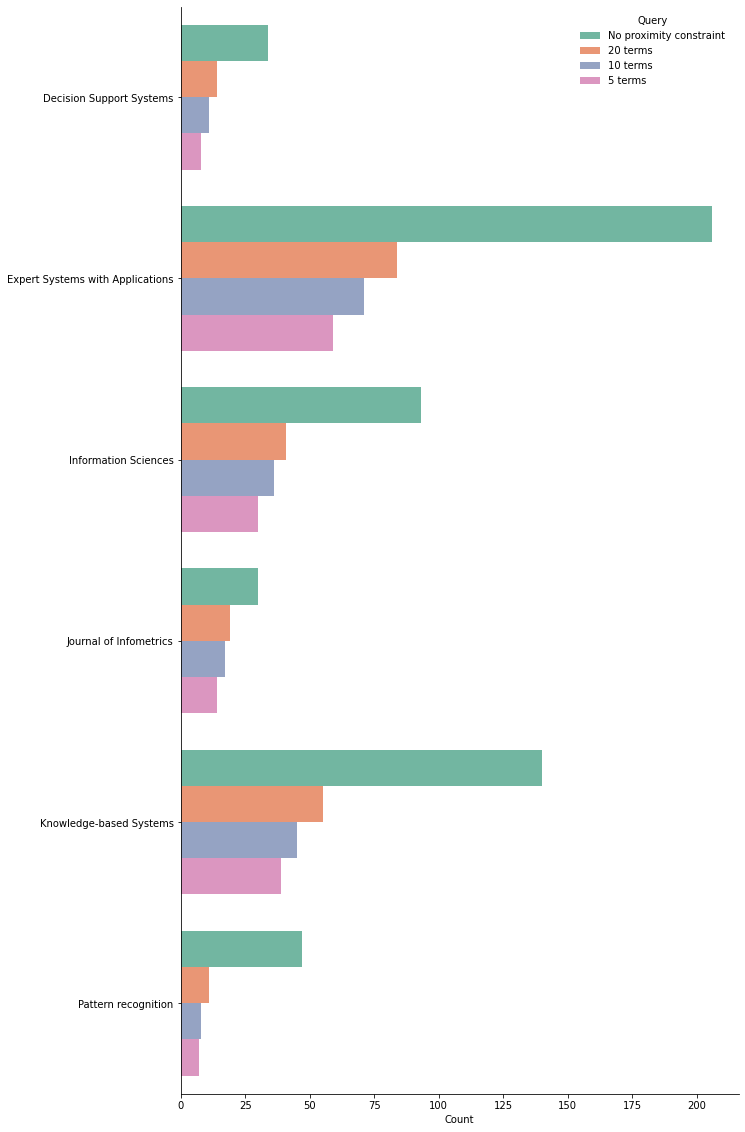

In [ ]:
dict = {
    "Decision Support Systems": [34, 14, 11, 8],
    "Expert Systems with Applications": [206, 84, 71, 59],
    "Information Sciences": [93, 41, 36, 30],
    "Journal of Infometrics": [30, 19, 17, 14],
    "Knowledge-based Systems": [140, 55, 45, 39],
    "Pattern recognition": [47, 11, 8, 7]
}

nr_res = pd.DataFrame(dict)
df_bar = nr_res.reset_index().melt(id_vars=["index"])

fig, ax = plt.subplots(figsize=(10, 20))
sns.set_palette("Set2")
g = sns.barplot(x="value", y="variable", hue="index", data=df_bar, ax=ax, orient="h")

h, l = g.get_legend_handles_labels()
g.legend(h, ['No proximity constraint', '20 terms', '10 terms', '5 terms'])
g.set_xlabel("Count")
g.set_ylabel("")

sns.move_legend(ax, "upper left", bbox_to_anchor=(0.7, 1), title='Query', frameon=False)
sns.despine()


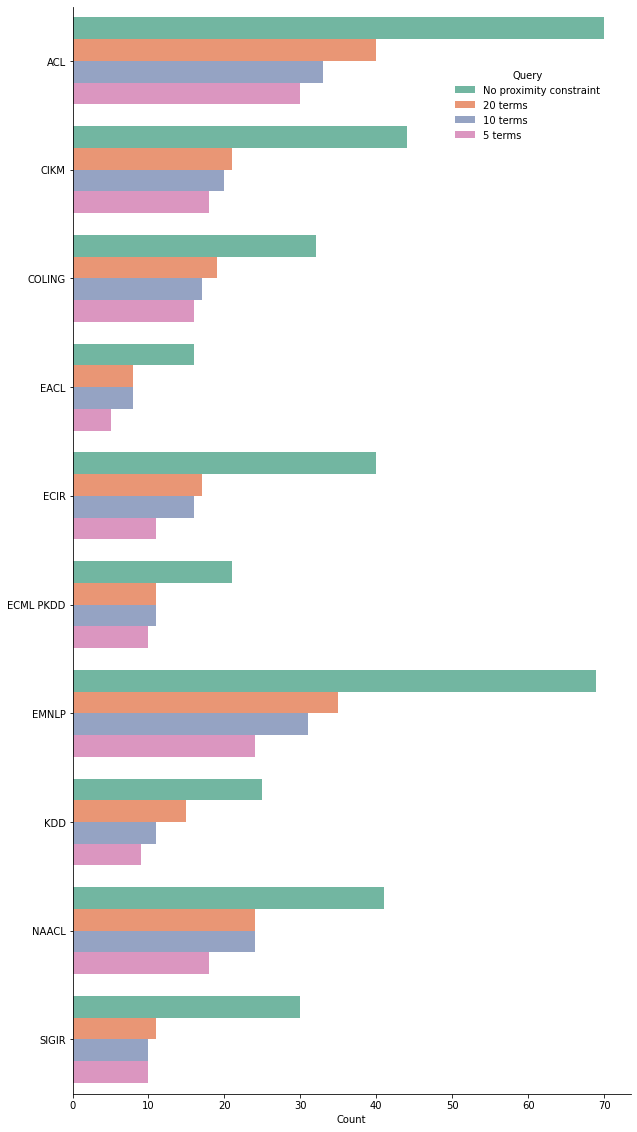

In [ ]:
dict = {
    "ACL": [70, 40, 33, 30],
    "CIKM": [44, 21, 20, 18],
    "COLING": [32, 19, 17, 16],
    "EACL": [16, 8, 8, 5],
    "ECIR": [40, 17, 16, 11],
    "ECML PKDD": [21, 11, 11, 10],
    "EMNLP": [69, 35, 31, 24],
    "KDD": [25, 15, 11, 9],
    "NAACL": [41, 24, 24, 18],
    "SIGIR": [30, 11, 10, 10]
}

nr_res = pd.DataFrame(dict)
df_bar = nr_res.reset_index().melt(id_vars=["index"])

fig, ax = plt.subplots(figsize=(10, 20))
sns.set_palette("Set2")
g = sns.barplot(y="variable", x="value", hue="index", data=df_bar, ax = ax)

h, l = g.get_legend_handles_labels()
g.legend(h, ['No proximity constraint', '20 terms', '10 terms', '5 terms'])
g.set_xlabel("Count")
g.set_ylabel("")

sns.move_legend(ax, "upper left", bbox_to_anchor=(0.67, 0.95), title='Query', frameon=False)
sns.despine()

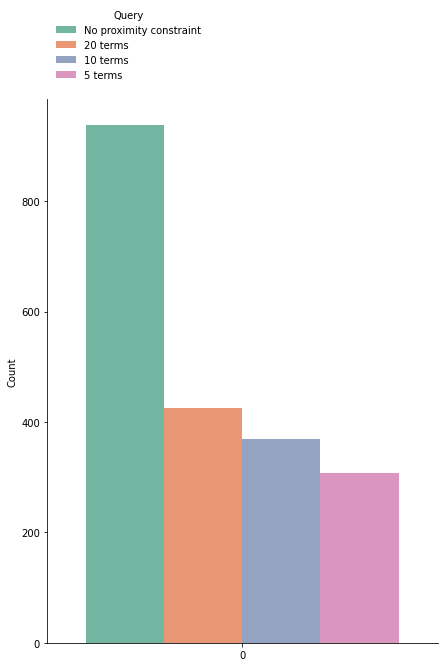

In [ ]:
totals = [938, 425, 369, 308]

nr_res = pd.DataFrame(totals)
df_bar = nr_res.reset_index().melt(id_vars=["index"])

fig, ax = plt.subplots(figsize=(7, 10))
sns.set_palette("Set2")
g = sns.barplot(x="variable", y="value", hue="index", data=df_bar, ax = ax)

h, l = g.get_legend_handles_labels()
g.legend(h, ['No proximity constraint', '20 terms', '10 terms', '5 terms'])
g.set_xlabel("")
g.set_ylabel("Count")

sns.move_legend(ax, "upper left", bbox_to_anchor=(0, 1.18), title='Query', frameon=False)
sns.despine()

In [12]:
totals = pd.DataFrame([70, 68, 66, 64], columns=['20 terms', '10 terms', '5 terms', '3 terms'])

nr_res = pd.DataFrame(totals)
df_bar = nr_res.reset_index().melt(id_vars=["index"])

fig, ax = plt.subplots(figsize=(7, 10))
sns.set_palette("Set2")
g = sns.barplot(x="variable", y="value", hue="index", data=df_bar, ax = ax)

h, l = g.get_legend_handles_labels()
g.set_xlabel("")
g.set_ylabel("Count")

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1), title='Query')

ValueError: Shape of passed values is (4, 1), indices imply (4, 4)

In [13]:
totals = pd.DataFrame([70, 68, 66, 64], columns=['20 terms', '10 terms', '5 terms', '3 terms'])
totals

ValueError: Shape of passed values is (4, 1), indices imply (4, 4)

IndexError: single positional indexer is out-of-bounds

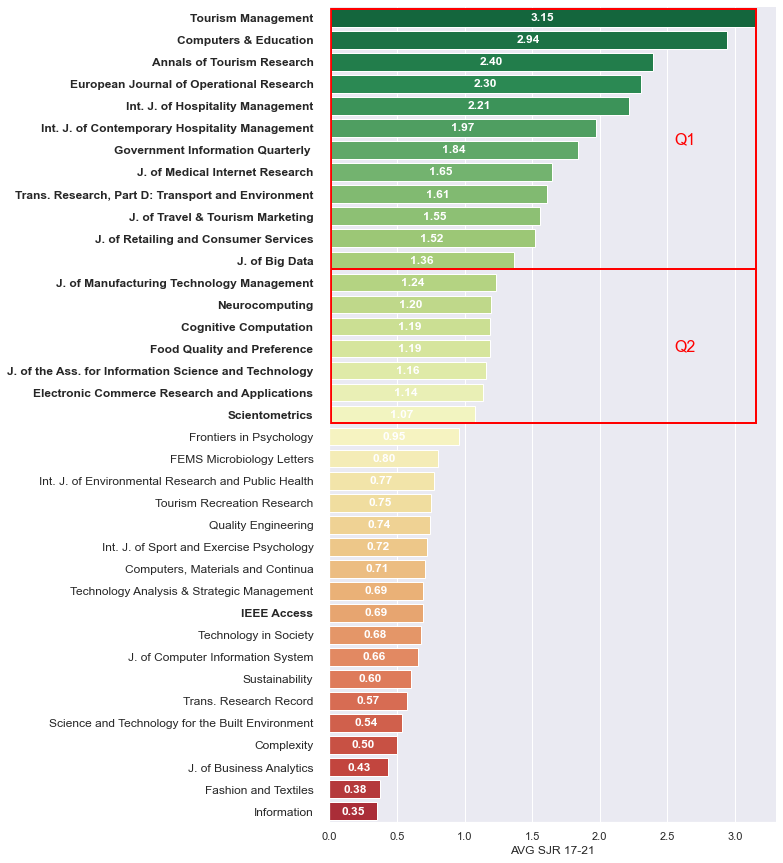

In [14]:
# Forward snowballing
dict = {
    'Tourism Management' : [3.146],
    'Computers & Education' : [2.94],
    'Annals of Tourism Research' : [2.395],
    'European Journal of Operational Research' : [2.304],
    'Int. J. of Hospitality Management' : [2.215],
    'Int. J. of Contemporary Hospitality Management' : [1.974],
    'Government Information Quarterly ' : [1.841],
    'J. of Medical Internet Research' : [1.645],
    'Trans. Research, Part D: Transport and Environment' : [1.61],
    'J. of Travel & Tourism Marketing' : [1.555],
    'J. of Retailing and Consumer Services' : [1.518],
    'J. of Big Data' : [1.363],
    'J. of Manufacturing Technology Management' : [1.236],
    'Neurocomputing' : [1.198],
    'Cognitive Computation' : [1.191],
    'Food Quality and Preference' : [1.19],
    'J. of the Ass. for Information Science and Technology' : [1.155],
    'Electronic Commerce Research and Applications' : [1.136],
    'Scientometrics' : [1.075],
    'Frontiers in Psychology' : [0.955],
    'FEMS Microbiology Letters' : [0.803],
    'Int. J. of Environmental Research and Public Health' : [0.771],
    'Tourism Recreation Research' : [0.748],
    'Quality Engineering' : [0.742],
    'Int. J. of Sport and Exercise Psychology' : [0.722],
    'Computers, Materials and Continua' : [0.707],
    'Technology Analysis & Strategic Management' : [0.69],
    'IEEE Access' : [0.689],
    'Technology in Society' : [0.676],
    'J. of Computer Information System' : [0.656],
    'Sustainability' : [0.602],
    'Trans. Research Record' : [0.573],
    'Science and Technology for the Built Environment' : [0.539],
    'Complexity' : [0.497],
    'J. of Business Analytics' : [0.434],
    'Fashion and Textiles' : [0.375],
    'Information' : [0.354]
}

import matplotlib.patches as patches

nr_res = pd.DataFrame(dict)
df_bar = nr_res.reset_index().melt(id_vars=["index"])
fig, ax = plt.subplots(figsize=(8, 15))
g = sns.barplot(y="variable", x="value", data=df_bar, ax=ax, palette=sns.color_palette("RdYlGn_r", n_colors=38))
g.set_xlabel('AVG SJR 17-21')
g.set_ylabel('')
sns.despine()

# Make the text of the first 6 y-axis entries bold
ax.tick_params(axis='y', which='major', pad=10)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)
for i in range(19):
    ax.get_yticklabels()[i].set_fontweight('bold')

ax.get_yticklabels()[27].set_fontweight('bold') # IEEE

# Calculate the width of the rectangle
rect_width = df_bar['value'][:1].sum()

# Add a rectangle that encloses the first 13 bars
rect = patches.Rectangle((0.01, -0.4), rect_width, 11.8, linewidth=2, edgecolor='red', facecolor='none')
ax.add_patch(rect)

# Add the "Q1" label to the rectangle
ax.text(rect.get_x() + rect.get_width()/2+1.05, rect.get_y() + rect.get_height()/2, 'Q1', fontsize=16, ha='center', va='center', color='red')

# Add a rectangle that encloses the next 7 bars
rect = patches.Rectangle((0.01, 11.4), rect_width, 7, linewidth=2, edgecolor='red', facecolor='none')
ax.add_patch(rect)

# Add the "Q2" label to the rectangle
ax.text(rect.get_x() + rect.get_width()/2+1.05, rect.get_y() + rect.get_height()/2, 'Q2', fontsize=16, ha='center', va='center', color='red')

# Write the x-axis values inside each bar
for i, p in enumerate(ax.patches):
    ax.text(p.get_x() + p.get_width()/2, p.get_y() + p.get_height()/2, f'{df_bar.iloc[i]["value"]:.2f}', ha='center', va='center', color='white', fontsize=12, fontweight='bold')

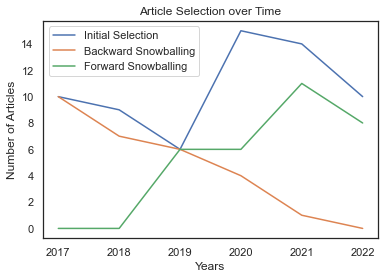

In [17]:
# Draw a lineplot using seaborn containing the data in the list below
# Data from initial_selection, backward_snowballing and forward_snowballing is used to draw the three lines (using different colors)
# Data from years represents the x axis

initial_selection = [10, 9, 6, 15, 14, 10]
backward_snowballing = [10, 7, 6, 4, 1, 0]
forward_snowballing = [0, 0, 6, 6, 11, 8]
years = [2017, 2018, 2019, 2020, 2021, 2022]

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")

# create data frame with the data
data = {"Years": years,
        "Initial Selection": initial_selection,
        "Backward Snowballing": backward_snowballing,
        "Forward Snowballing": forward_snowballing}
df = pd.DataFrame(data)

sns.set_style(style='white') 
sns.despine()

# plot lineplot with seaborn
sns.lineplot(x="Years", y="Initial Selection", data=df, label="Initial Selection")
sns.lineplot(x="Years", y="Backward Snowballing", data=df, label="Backward Snowballing")
sns.lineplot(x="Years", y="Forward Snowballing", data=df, label="Forward Snowballing")

# set labels and title
plt.xlabel("Years")
plt.ylabel("Number of Articles")
plt.title("Article Selection over Time")

plt.show()

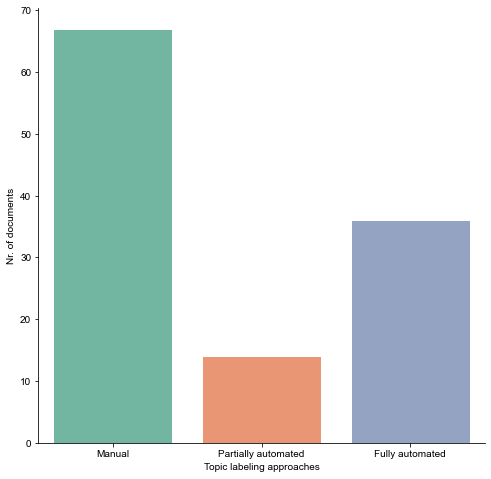

In [3]:
totals = [67, 14, 36]
paritions = [[5,58],[2,7],[18,13]]
labels = ['Manual', 'Partially automated','Fully automated']
fig, ax = plt.subplots(figsize=(8, 8))
sns.set_theme(style='white')
sns.set_palette('Set2')
sns.barplot(y=totals, x=labels, ax=ax)
plt.xlabel('Topic labeling approaches')
plt.ylabel('Nr. of documents')
sns.despine()
plt.show()

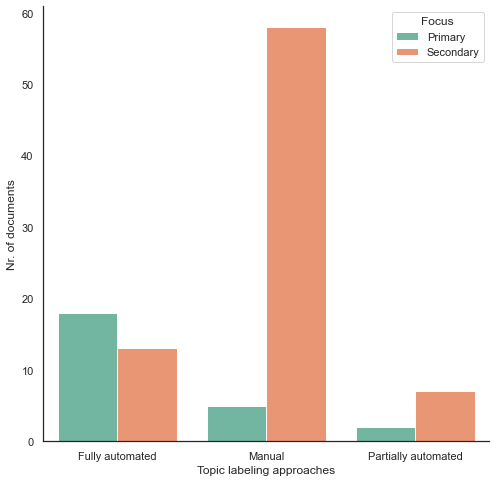

In [35]:
df = pd.DataFrame()
labeling_approach = ["Fully automated","Fully automated","Fully automated","Fully automated","Fully automated","Fully automated","Fully automated","Fully automated","Fully automated","Fully automated","Fully automated","Fully automated","Fully automated","Fully automated","Fully automated","Fully automated","Fully automated","Fully automated","Fully automated","Fully automated","Fully automated","Fully automated","Fully automated","Fully automated","Fully automated","Fully automated","Fully automated","Fully automated","Fully automated","Fully automated","Fully automated","Manual","Manual","Manual","Manual","Manual","Manual","Manual","Manual","Manual","Manual","Manual","Manual","Manual","Manual","Manual","Manual","Manual","Manual","Manual","Manual","Manual","Manual","Manual","Manual","Manual","Manual","Manual","Manual","Manual","Manual","Manual","Manual","Manual","Manual","Manual","Manual","Manual","Manual","Manual","Manual","Manual","Manual","Manual","Manual","Manual","Manual","Manual","Manual","Manual","Manual","Manual","Manual","Manual","Manual","Manual","Manual","Manual","Manual","Manual","Manual","Manual","Manual","Manual","Partially automated","Partially automated","Partially automated","Partially automated","Partially automated","Partially automated","Partially automated","Partially automated","Partially automated"]
focus = ["Primary","Primary","Primary","Primary","Primary","Primary","Primary","Primary","Primary","Primary","Primary","Primary","Primary","Primary","Primary","Primary","Primary","Primary","Secondary","Secondary","Secondary","Secondary","Secondary","Secondary","Secondary","Secondary","Secondary","Secondary","Secondary","Secondary","Secondary","Primary","Primary","Primary","Primary","Primary","Secondary","Secondary","Secondary","Secondary","Secondary","Secondary","Secondary","Secondary","Secondary","Secondary","Secondary","Secondary","Secondary","Secondary","Secondary","Secondary","Secondary","Secondary","Secondary","Secondary","Secondary","Secondary","Secondary","Secondary","Secondary","Secondary","Secondary","Secondary","Secondary","Secondary","Secondary","Secondary","Secondary","Secondary","Secondary","Secondary","Secondary","Secondary","Secondary","Secondary","Secondary","Secondary","Secondary","Secondary","Secondary","Secondary","Secondary","Secondary","Secondary","Secondary","Secondary","Secondary","Secondary","Secondary","Secondary","Secondary","Secondary","Secondary","Primary","Primary","Secondary","Secondary","Secondary","Secondary","Secondary","Secondary","Secondary"]
df['Labeling approach'] = labeling_approach
df['Focus'] = focus
df['Count'] = count
fig, ax = plt.subplots(figsize=(8, 8))
sns.set_theme(style='white')
sns.set_palette('Set2')
sns.countplot(x=df['Labeling approach'], hue=df['Focus'], ax=ax)
plt.xlabel('Topic labeling approaches')
plt.ylabel('Nr. of documents')
sns.despine()

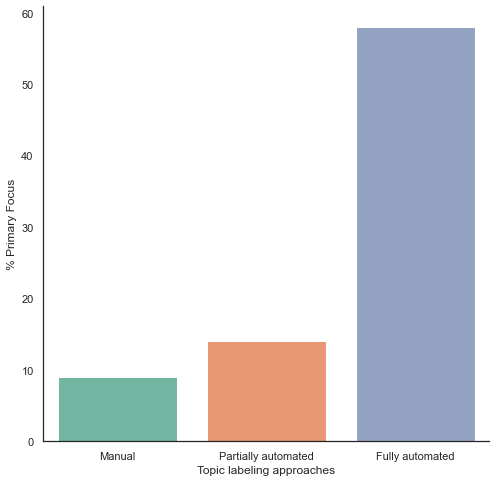

In [4]:
totals = [9, 14, 58]
paritions = [[5,58],[2,7],[18,13]]
labels = ['Manual', 'Partially automated','Fully automated']
fig, ax = plt.subplots(figsize=(8, 8))
sns.set_theme(style='white')
sns.set_palette('Set2')
sns.barplot(y=totals, x=labels, ax=ax)
plt.xlabel('Topic labeling approaches')
plt.ylabel('% Primary Focus')
sns.despine()
plt.show()

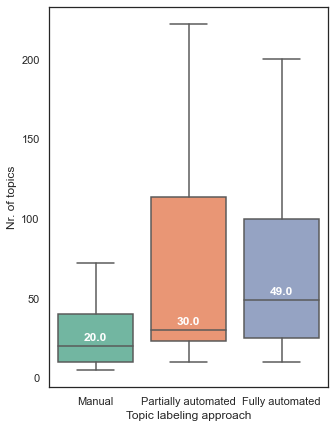

In [66]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

nr_topics_manual = [25, 390, 600, 500, 325, 300, 130, 100, 97, 72, 65, 65, 62, 60, 50, 50, 41, 40, 40, 38, 37, 30, 30, 30, 30, 29, 29, 26, 25, 25, 25, 22, 20, 20, 20, 20, 20, 18, 17, 16, 16, 16, 15, 14, 14, 12, 12, 12, 10, 10, 10, 10, 10, 10, 9, 9, 9, 8, 8, 8, 8, 7, 7, 6, 6, 5, 5]
nr_topics_pa = [28, 325, 300, 222, 130, 65, 55, 30, 30, 22, 20, 14, 10, 27, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]
nr_topics_fa = [600, 219, 215, 200, 187, 154, 150, 145, 100, 100, 100, 90, 85, 61, 53, 50, 50, 48, 30, 30, 28, 26, 25, 25, 25, 25, 24, 22, 20, 20, 15, 14, 14, 10, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]

# find the length of the longest list
max_len = max(len(nr_topics_manual), len(nr_topics_pa), len(nr_topics_fa))

# pad the shorter lists with None values
nr_topics_manual += [None] * (max_len - len(nr_topics_manual))
nr_topics_pa += [None] * (max_len - len(nr_topics_pa))
nr_topics_fa += [None] * (max_len - len(nr_topics_fa))

# create a DataFrame
df = pd.DataFrame({'Manual': nr_topics_manual, 'Partially automated': nr_topics_pa, 'Fully automated': nr_topics_fa})

# create the boxplot
fig, ax = plt.subplots(figsize=(5, 7))
sns.set_theme(style='white')
sns.set_palette('Set2')
sns.boxplot(x="variable", y="value", data=pd.melt(df), ax=ax, flierprops={"marker": "x"}, showfliers = False)

plt.xlabel('Topic labeling approach')
plt.ylabel('Nr. of topics')

# add label for the median value to each
medians = df.median().values
positions = range(len(medians))
for i, median in enumerate(medians):
    ax.text(positions[i], median+2, f'{median:.1f}', horizontalalignment='center', verticalalignment='bottom', fontweight='bold', color='white')


<AxesSubplot:xlabel='variable', ylabel='value'>

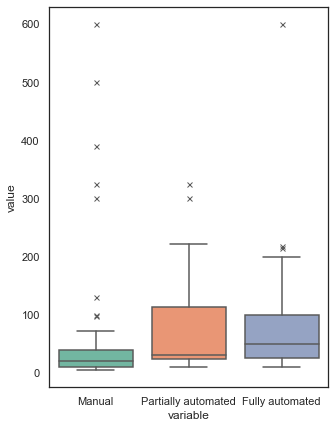

In [57]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

nr_topics_manual = [25, 390, 600, 500, 325, 300, 130, 100, 97, 72, 65, 65, 62, 60, 50, 50, 41, 40, 40, 38, 37, 30, 30, 30, 30, 29, 29, 26, 25, 25, 25, 22, 20, 20, 20, 20, 20, 18, 17, 16, 16, 16, 15, 14, 14, 12, 12, 12, 10, 10, 10, 10, 10, 10, 9, 9, 9, 8, 8, 8, 8, 7, 7, 6, 6, 5, 5]
nr_topics_pa = [28, 325, 300, 222, 130, 65, 55, 30, 30, 22, 20, 14, 10, 27, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]
nr_topics_fa = [600, 219, 215, 200, 187, 154, 150, 145, 100, 100, 100, 90, 85, 61, 53, 50, 50, 48, 30, 30, 28, 26, 25, 25, 25, 25, 24, 22, 20, 20, 15, 14, 14, 10, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]

# find the length of the longest list
max_len = max(len(nr_topics_manual), len(nr_topics_pa), len(nr_topics_fa))

# pad the shorter lists with None values
nr_topics_manual += [None] * (max_len - len(nr_topics_manual))
nr_topics_pa += [None] * (max_len - len(nr_topics_pa))
nr_topics_fa += [None] * (max_len - len(nr_topics_fa))

# create a DataFrame
df = pd.DataFrame({'Manual': nr_topics_manual, 'Partially automated': nr_topics_pa, 'Fully automated': nr_topics_fa})

# create the boxplot
fig, ax = plt.subplots(figsize=(5, 7))
sns.set_theme(style='white')
sns.set_palette('Set2')
sns.boxplot(x="variable", y="value", data=pd.melt(df), ax=ax, flierprops={"marker": "x"}, showfliers = True)



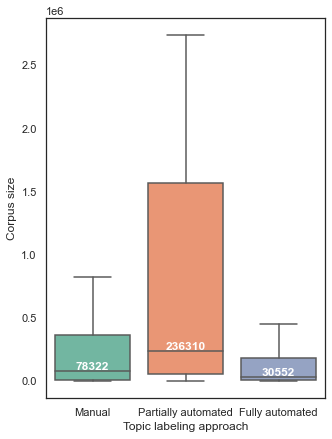

In [22]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

nr_topics_manual = [282, 308, 325, 763, 1008, 1481, 1604, 1920, 2657, 3963, 4373, 5220, 5521, 6767, 7000, 7156, 8610, 12026, 14172, 14495, 19421, 22819, 24000, 25706, 30843, 37094, 41009, 42000, 43869, 52264, 53842, 64350, 78322, 86803, 94340, 109274, 123629, 140966, 217074, 229204, 242020, 255644, 289921, 297933, 319873, 344456, 346387, 349550, 366244, 371420, 386379, 495240, 557208, 595548, 733411, 820778, 1700000, 2735437, 4700000, 7948886, 10000000, 15789411, 23214872, 38000000, 38000000]
nr_topics_pa = [3386, 8196, 18750, 52264, 64350, 217074, 230599, 242020, 344456, 1165000, 1700000, 2411440, 2735437, 4500000]
nr_topics_fa = [50, 183, 2010, 2097, 2103, 4985, 5262, 5262, 5262, 7156, 10135, 18000, 18750, 22611, 24353, 30532, 30552, 44331, 45325, 48000, 100000, 106574, 106574, 147322, 184976, 188734, 385803, 419189, 449000, 1889656, 2411440, 4300000, 82840998]

# find the length of the longest list
max_len = max(len(nr_topics_manual), len(nr_topics_pa), len(nr_topics_fa))

# pad the shorter lists with None values
nr_topics_manual += [None] * (max_len - len(nr_topics_manual))
nr_topics_pa += [None] * (max_len - len(nr_topics_pa))
nr_topics_fa += [None] * (max_len - len(nr_topics_fa))

# create a DataFrame
df = pd.DataFrame({'Manual': nr_topics_manual, 'Partially automated': nr_topics_pa, 'Fully automated': nr_topics_fa})

# create the boxplot
fig, ax = plt.subplots(figsize=(5, 7))
sns.set_theme(style='white')
sns.set_palette('Set2')
sns.boxplot(x="variable", y="value", data=pd.melt(df), ax=ax, flierprops={"marker": "x"}, showfliers = False)

plt.xlabel('Topic labeling approach')
plt.ylabel('Corpus size')

# add label for the median value to each
medians = df.median().values
positions = range(len(medians))
for i, median in enumerate(medians):
    ax.text(positions[i], median+2, f'{median:.0f}', horizontalalignment='center', verticalalignment='bottom', fontweight='bold', color='white')


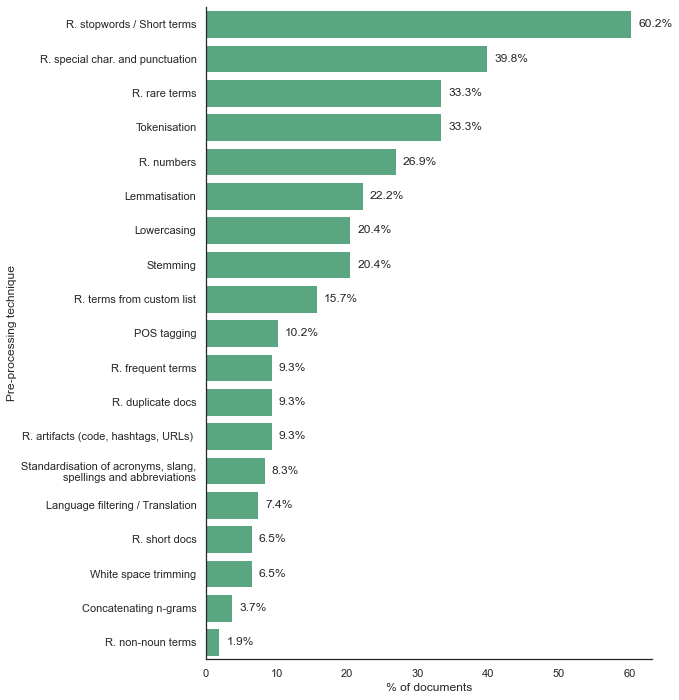

In [45]:
totals = [60.2, 39.8, 33.3, 33.3, 26.9, 22.2, 20.4, 20.4, 15.7, 10.2, 9.3, 9.3, 9.3, 8.3, 7.4, 6.5, 6.5, 3.7, 1.9]
labels = ['R. stopwords / Short terms', 'R. special char. and punctuation', 'R. rare terms', 'Tokenisation', 'R. numbers', 'Lemmatisation', 'Lowercasing', 'Stemming', 'R. terms from custom list', 'POS tagging', 'R. frequent terms', 'R. duplicate docs', 'R. artifacts (code, hashtags, URLs) ', 'Standardisation of acronyms, slang,\nspellings and abbreviations', 'Language filtering / Translation', 'R. short docs', 'White space trimming', 'Concatenating n-grams', 'R. non-noun terms']
fig, ax = plt.subplots(figsize=(8, 12))
sns.set_theme(style='white')
sns.set_palette('Set2')
ax = sns.barplot(x=totals, y=labels, color=(0.3, 0.7, 0.5, 0.7) )

# Add count labels to each bar
for i, total in enumerate(totals):
    ax.text(total+1, i, f'{total}%', va='center')

plt.xlabel('% of documents')
plt.ylabel('Pre-processing technique')
sns.despine()
plt.show()

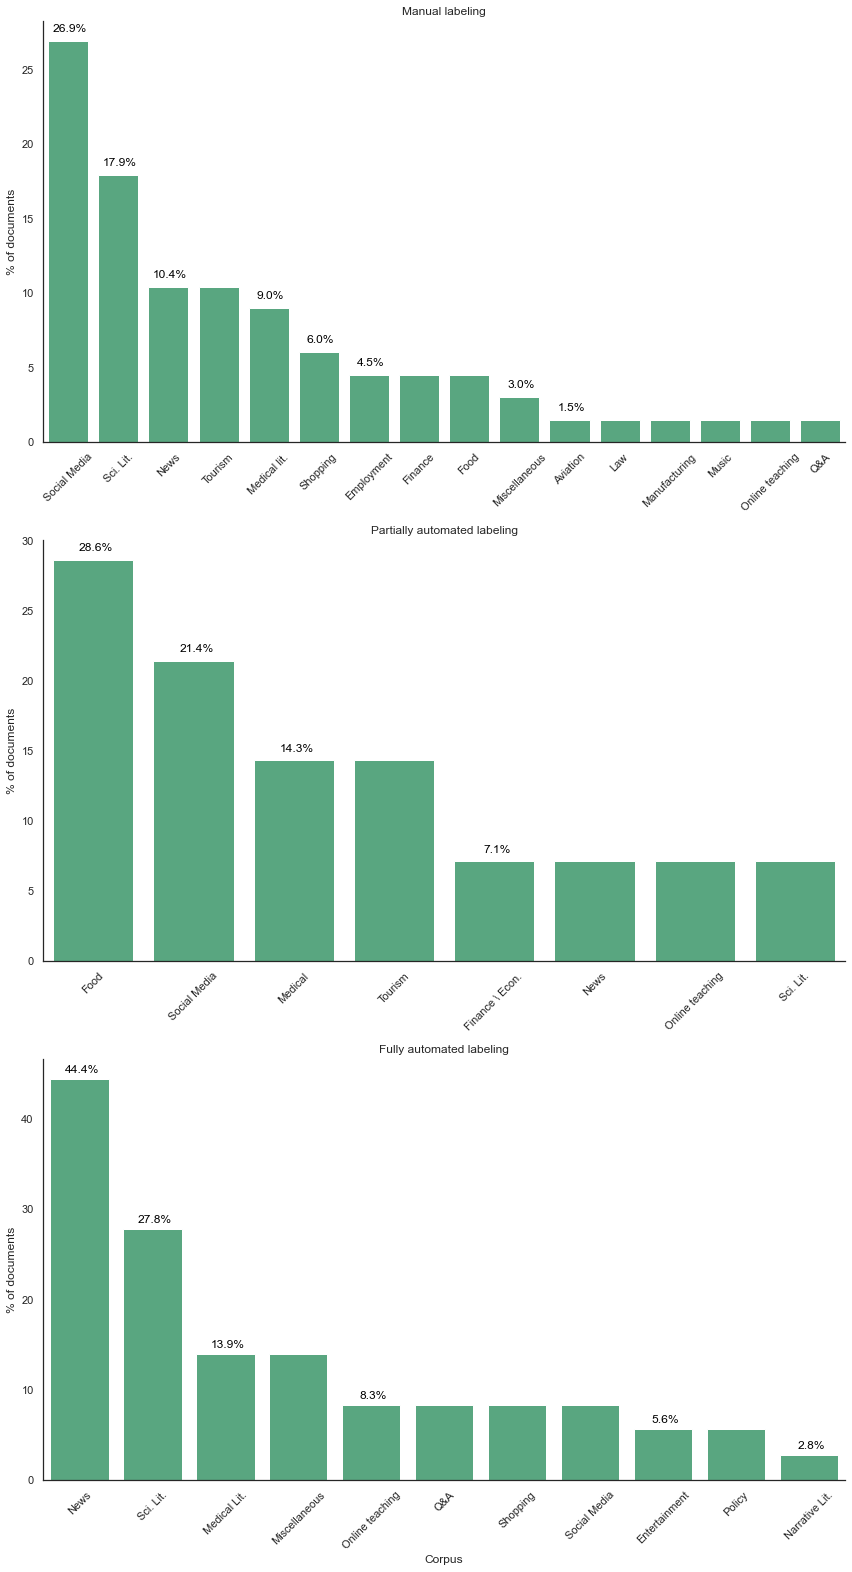

In [144]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data for manual labeling
labels_ml = ['Social Media','Sci. Lit.','News','Tourism','Medical lit.','Shopping','Employment','Finance','Food','Miscellaneous','Aviation','Law','Manufacturing','Music','Online teaching','Q&A']
values_ml = [26.9,17.9,10.4,10.4,9.0,6.0,4.5,4.5,4.5,3.0,1.5,1.5,1.5,1.5,1.5,1.5]

# Data for partially automated labeling
labels_pa = ['Food','Social Media','Medical','Tourism','Finance \ Econ.','News','Online teaching','Sci. Lit.']
values_pa = [28.6,21.4,14.3,14.3,7.1,7.1,7.1,7.1]

# Data for fully automated labeling
labels_fa = ['News','Sci. Lit.','Medical Lit.','Miscellaneous','Online teaching','Q&A','Shopping','Social Media','Entertainment','Policy','Narrative Lit.']
values_fa = [44.4,27.8,13.9,13.9,8.3,8.3,8.3,8.3,5.6,5.6,2.8]

# Create a grid of subplots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 22), sharey=False)

# Plot manual labeling
sns.set_theme(style='white')
sns.set_palette('Set2')
sns.despine()
ax1 = sns.barplot(y=values_ml, x=labels_ml, color=(0.3, 0.7, 0.5, 0.7), ax=axes[0])
ax1.set_ylabel('% of documents')
ax1.set_title('Manual labeling')
ax1.tick_params(axis='x', rotation=45)

# Add white labels inside each bar for manual labeling
prev_val = 0
for i, value in enumerate(values_ml):
    if(prev_val == 0 or prev_val != value):
        ax1.text(i+0.03, value+0.5, f'{value}%', ha='center', va='bottom', color='black')
        prev_val = value

# Plot partially automated labeling
sns.set_theme(style='white')
sns.set_palette('Set2')
sns.despine()
ax2 = sns.barplot(y=values_pa, x=labels_pa, color=(0.3, 0.7, 0.5, 0.7), ax=axes[1])
ax2.set_ylabel('% of documents')
ax2.set_title('Partially automated labeling')
ax2.tick_params(axis='x', rotation=45)

# Add white labels inside each bar for partially automated labeling
prev_val = 0
for i, value in enumerate(values_pa):
    if(prev_val == 0 or prev_val != value):
        ax2.text(i+0.03, value+0.5, f'{value}%', ha='center', va='bottom', color='black')
        prev_val = value

# Plot fully automated labeling
sns.set_theme(style='white')
sns.set_palette('Set2')
sns.despine()
ax3 = sns.barplot(y=values_fa, x=labels_fa, color=(0.3, 0.7, 0.5, 0.7), ax=axes[2])
ax3.set_ylabel('% of documents')
ax3.set_xlabel('Corpus')
ax3.set_title('Fully automated labeling')
ax3.tick_params(axis='x', rotation=45)

prev_val = 0
for i, value in enumerate(values_fa):
    if(prev_val == 0 or prev_val != value):
        ax3.text(i+0.03, value+0.5, f'{value}%', ha='center', va='bottom', color='black')
        prev_val = value

plt.tight_layout()
plt.show()


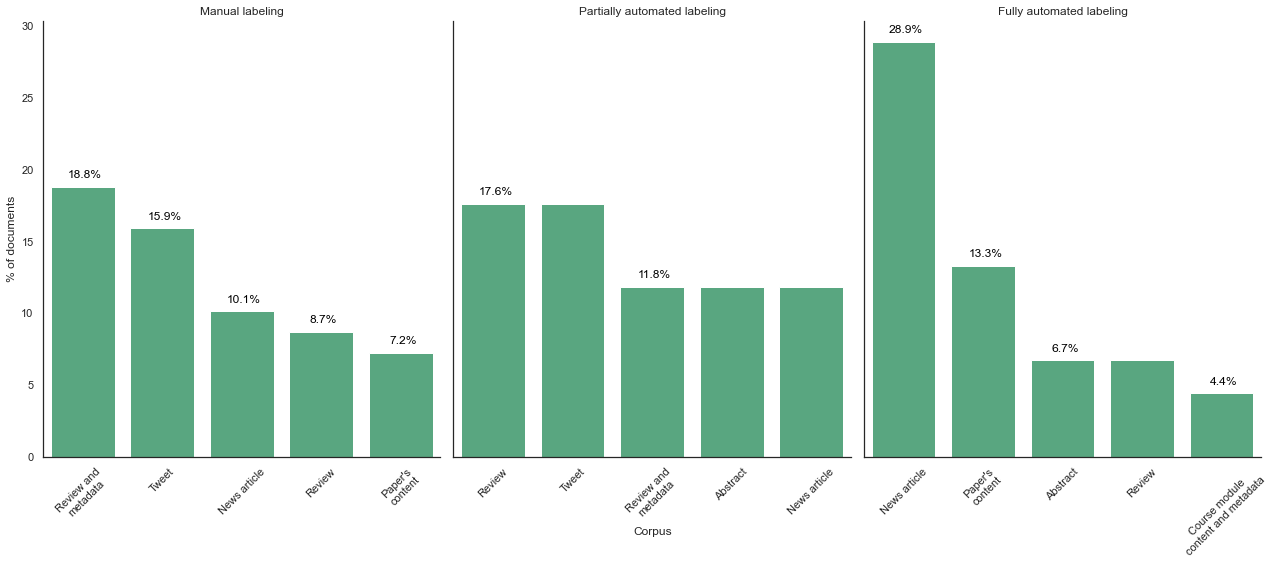

In [145]:
import matplotlib.pyplot as plt
import seaborn as sns

values_fa = [28.9,13.3,6.7,6.7,4.4]
labels_fa = ['News article','Paper\'s\ncontent','Abstract','Review','Course module\ncontent and metadata']

values_ml = [18.8,15.9,10.1,8.7,7.2]
labels_ml = ['Review and\nmetadata','Tweet','News article','Review','Paper\'s\ncontent']

values_pa = [17.6,17.6,11.8,11.8,11.8]
labels_pa = ['Review','Tweet','Review and\nmetadata','Abstract','News article']

# Create a grid of subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 8), sharey=True)

# Plot manual labeling
sns.set_theme(style='white')
sns.set_palette('Set2')
sns.despine()
ax1 = sns.barplot(y=values_ml, x=labels_ml, color=(0.3, 0.7, 0.5, 0.7), ax=axes[0])
ax1.set_ylabel('% of documents')
ax1.set_title('Manual labeling')
ax1.tick_params(axis='x', rotation=45)

# Add white labels inside each bar for manual labeling
prev_val = 0
for i, value in enumerate(values_ml):
    if(prev_val == 0 or prev_val != value):
        ax1.text(i+0.03, value+0.5, f'{value}%', ha='center', va='bottom', color='black')
        prev_val = value

# Plot partially automated labeling
sns.set_theme(style='white')
sns.set_palette('Set2')
sns.despine()
ax2 = sns.barplot(y=values_pa, x=labels_pa, color=(0.3, 0.7, 0.5, 0.7), ax=axes[1])
ax2.set_xlabel('Corpus')
ax2.set_title('Partially automated labeling')
ax2.tick_params(axis='x', rotation=45)

# Add white labels inside each bar for partially automated labeling
prev_val = 0
for i, value in enumerate(values_pa):
    if(prev_val == 0 or prev_val != value):
        ax2.text(i+0.03, value+0.5, f'{value}%', ha='center', va='bottom', color='black')
        prev_val = value

# Plot fully automated labeling
sns.set_theme(style='white')
sns.set_palette('Set2')
sns.despine()
ax3 = sns.barplot(y=values_fa, x=labels_fa, color=(0.3, 0.7, 0.5, 0.7), ax=axes[2])
ax3.set_title('Fully automated labeling')
ax3.tick_params(axis='x', rotation=45)

prev_val = 0
for i, value in enumerate(values_fa):
    if(prev_val == 0 or prev_val != value):
        ax3.text(i+0.03, value+0.5, f'{value}%', ha='center', va='bottom', color='black')
        prev_val = value

plt.tight_layout()
plt.show()


In [157]:
import re

def process_input(input_string):
    # Lowercase the input string
    processed_string = input_string.lower()
    
    # Remove numbers and symbols
    processed_string = re.sub(r'[^a-zA-Z\s]', '', processed_string)
    
    # Replace spaces with underscores
    processed_string = processed_string.replace(' ', '_')
    
    return processed_string

# Example usage
input_string = input("Enter an input string: ")
processed_string = process_input(input_string)
print("Processed string:", processed_string)


Processed string: contcommrtd_a_distributed_contentbased_misinformationaware_community_detection_system_for_realtime_disaster_reporting
